# Use Case 1: Target Positions with Hedging

This notebook demonstrates:
1. Using target positions (shares, notional, weights)
2. Beta hedging for market neutrality
3. Sector hedging for sector neutrality
4. Comparing hedged vs unhedged performance

In [12]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from backtesting import Backtester, BacktestConfig, DataManager
from backtesting.utils import get_date_range
from notebooks.notebook_utils import setup_plotting_style, plot_results_summary

%matplotlib inline
setup_plotting_style()

## Load Data

In [13]:
data_manager = DataManager(data_dir='../sample_data', use_float32=True)
prices = data_manager.load_prices()

# Get date range
start_date = prices.index[0]
end_date = prices.index[-1]

print(f"Data loaded: {len(prices.columns)} securities")
print(f"Date range: {start_date.date()} to {end_date.date()}")

Loaded prices: 1250 dates, 1500 securities
Data loaded: 1500 securities
Date range: 2023-01-02 to 2027-10-15


## Example 1: Target Weights (No Hedging)

In [14]:
# Load equal-weight targets
target_weights = pd.read_csv('../sample_data/target_weights.csv',
                              index_col=0, parse_dates=True)
target_weights = target_weights.loc[start_date:end_date]

targets_by_date = {
    date: target_weights.loc[date].to_dict()
    for date in target_weights.index
}

inputs = {'type': 'weights', 'targets': targets_by_date}

# Configure without hedging
config_no_hedge = BacktestConfig(
    initial_cash=10_000_000,
    max_adv_participation=0.05,
    enable_beta_hedge=False,
    enable_sector_hedge=False,
    risk_free_rate=0.02
)

# Run backtest
print("Running backtest WITHOUT hedging...")
backtester = Backtester(config_no_hedge, data_manager)
results_no_hedge = backtester.run(
    start_date=start_date,
    end_date=end_date,
    use_case=1,
    inputs=inputs,
    show_progress=True
)

Running backtest WITHOUT hedging...

Starting Backtest - Use Case 1
Period: 2023-01-02 to 2027-10-15

Loading data...
Loaded ADV: 1250 dates, 1500 securities
Loaded factor exposures: 1250 dates, 1500 securities, 5 factors
Loaded factor returns: 1250 dates, 5 factors
Loaded factor covariance: (5, 5)
Loaded specific variance: 1250 dates, 1500 securities
DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13',
               ...
               '2027-10-04', '2027-10-05', '2027-10-06', '2027-10-07',
               '2027-10-08', '2027-10-11', '2027-10-12', '2027-10-13',
               '2027-10-14', '2027-10-15'],
              dtype='datetime64[ns]', length=1250, freq=None) <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Trading days: 1250
Initial portfolio value: $10,000,000.00



Simulating: 100%|██████████| 1250/1250 [01:29<00:00, 13.91it/s]


Backtest Complete
Final portfolio value: $48,478,820.71



## Example 2: Target Weights with Beta Hedging

In [15]:
# Configure with beta hedging
config_beta_hedge = BacktestConfig(
    initial_cash=10_000_000,
    max_adv_participation=0.05,
    enable_beta_hedge=True,
    beta_hedge_instrument='SPY',
    target_beta=0.0,  # Market neutral
    enable_sector_hedge=False,
    risk_free_rate=0.02
)

# Run backtest
print("\nRunning backtest WITH beta hedging...")
backtester = Backtester(config_beta_hedge, data_manager)
results_beta_hedge = backtester.run(
    start_date=start_date,
    end_date=end_date,
    use_case=1,
    inputs=inputs,
    show_progress=True
)


Running backtest WITH beta hedging...

Starting Backtest - Use Case 1
Period: 2023-01-02 to 2027-10-15

Loading data...
Loaded betas: 1250 dates, 1500 securities
DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13',
               ...
               '2027-10-04', '2027-10-05', '2027-10-06', '2027-10-07',
               '2027-10-08', '2027-10-11', '2027-10-12', '2027-10-13',
               '2027-10-14', '2027-10-15'],
              dtype='datetime64[ns]', length=1250, freq=None) <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Trading days: 1250
Initial portfolio value: $10,000,000.00



Simulating: 100%|██████████| 1250/1250 [01:32<00:00, 13.51it/s]


Backtest Complete
Final portfolio value: $48,478,820.71



## Example 3: Target Weights with Sector Hedging

In [16]:
# Configure with sector hedging
config_sector_hedge = BacktestConfig(
    initial_cash=10_000_000,
    max_adv_participation=0.05,
    enable_beta_hedge=False,
    enable_sector_hedge=True,
    risk_free_rate=0.02
)

# Run backtest
print("\nRunning backtest WITH sector hedging...")
backtester = Backtester(config_sector_hedge, data_manager)
results_sector_hedge = backtester.run(
    start_date=start_date,
    end_date=end_date,
    use_case=1,
    inputs=inputs,
    show_progress=True
)


Running backtest WITH sector hedging...

Starting Backtest - Use Case 1
Period: 2023-01-02 to 2027-10-15

Loading data...
Loaded sector mapping: 1500 securities, 10 sectors
DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13',
               ...
               '2027-10-04', '2027-10-05', '2027-10-06', '2027-10-07',
               '2027-10-08', '2027-10-11', '2027-10-12', '2027-10-13',
               '2027-10-14', '2027-10-15'],
              dtype='datetime64[ns]', length=1250, freq=None) <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Trading days: 1250
Initial portfolio value: $10,000,000.00



Simulating: 100%|██████████| 1250/1250 [00:16<00:00, 75.82it/s]


Backtest Complete
Final portfolio value: $10,000,000.00



## Compare Results

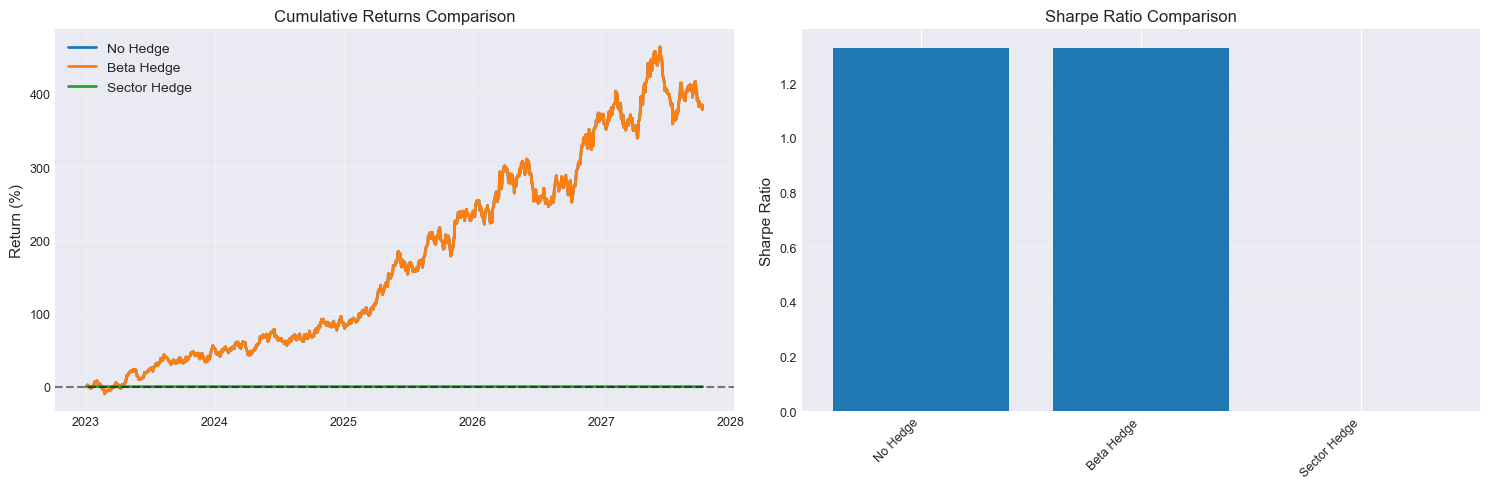


Metrics Comparison:
Strategy             Total Return    Sharpe     Max DD     Win Rate  
--------------------------------------------------------------------------------
No Hedge                   384.79%      1.33    18.69%    53.60%
Beta Hedge                 384.79%      1.33    18.69%    53.60%
Sector Hedge                 0.00%      0.00     0.00%     0.00%


In [17]:
from notebooks.notebook_utils import compare_strategies

compare_strategies(
    [results_no_hedge, results_beta_hedge, results_sector_hedge],
    ['No Hedge', 'Beta Hedge', 'Sector Hedge'],
    metric='sharpe_ratio'
)

## Analyze Hedge Effectiveness

In [18]:
# Get metrics for all three
metrics_no_hedge = results_no_hedge.calculate_metrics()
metrics_beta = results_beta_hedge.calculate_metrics()
metrics_sector = results_sector_hedge.calculate_metrics()

# Compare
comparison_df = pd.DataFrame({
    'No Hedge': metrics_no_hedge,
    'Beta Hedge': metrics_beta,
    'Sector Hedge': metrics_sector
})

print("\nMetrics Comparison:")
print(comparison_df.loc[['total_return', 'sharpe_ratio', 'max_drawdown', 
                         'volatility', 'win_rate']].round(4))


Metrics Comparison:
              No Hedge  Beta Hedge  Sector Hedge
total_return    3.8479      3.8479           0.0
sharpe_ratio    1.3304      1.3304           0.0
max_drawdown    0.1869      0.1869           0.0
volatility      0.2473      0.2473           0.0
win_rate        0.5360      0.5360           0.0


## Visualize Net Exposure Differences

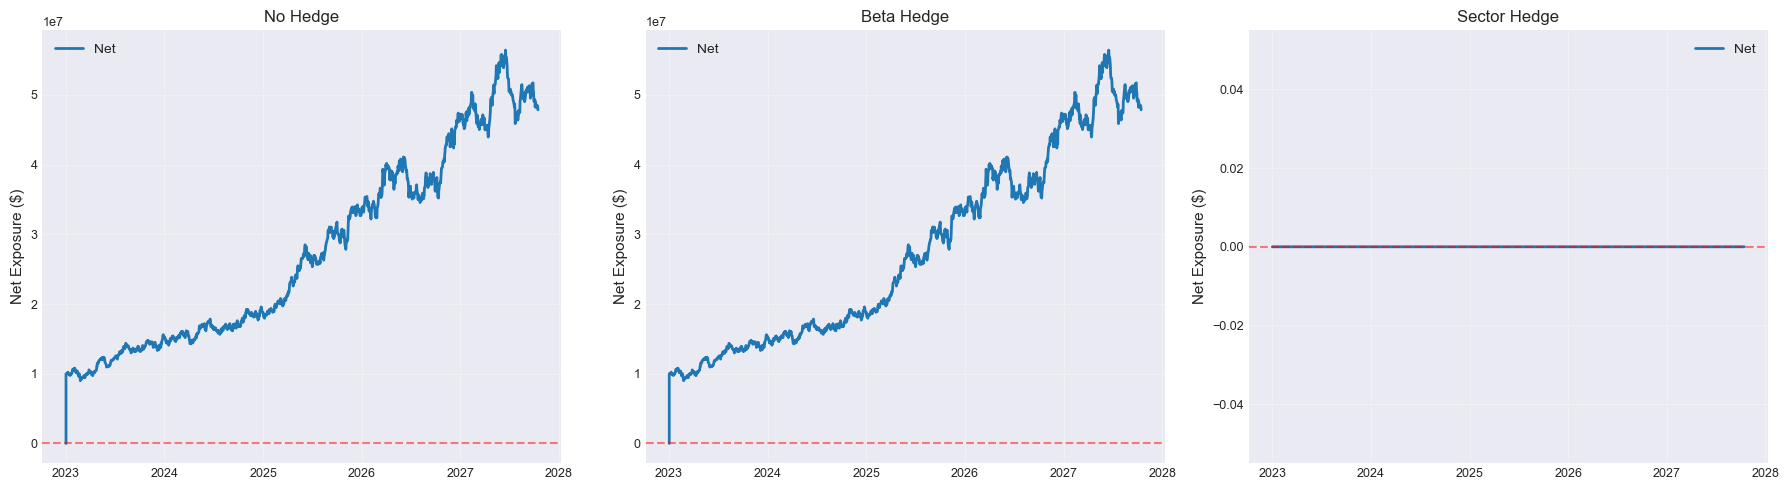


Note: Beta hedge should keep net exposure closer to zero


In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (results, title) in enumerate([
    (results_no_hedge, 'No Hedge'),
    (results_beta_hedge, 'Beta Hedge'),
    (results_sector_hedge, 'Sector Hedge')
]):
    df = results.to_dataframe()
    
    axes[idx].plot(df['date'], df['net_exposure'], label='Net', linewidth=2)
    axes[idx].axhline(y=0, color='red', linestyle='--', alpha=0.5)
    axes[idx].set_title(title)
    axes[idx].set_ylabel('Net Exposure ($)')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend()

plt.tight_layout()
plt.show()

print("\nNote: Beta hedge should keep net exposure closer to zero")

## Example 4: Target Notional

In [20]:
# Create target notional (dollar amounts)
# Each security gets $100,000
target_notional_by_date = {}
for date in target_weights.index:
    target_notional_by_date[date] = {
        ticker: 100000.0 for ticker in target_weights.columns
    }

inputs_notional = {
    'type': 'notional',
    'targets': target_notional_by_date
}

# Run with notional targets
print("\nRunning with target notional...")
results_notional = backtester.run(
    start_date=start_date,
    end_date=end_date,
    use_case=1,
    inputs=inputs_notional,
    show_progress=True
)

results_notional.print_summary()


Running with target notional...

Starting Backtest - Use Case 1
Period: 2023-01-02 to 2027-10-15

Loading data...
DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13',
               ...
               '2027-10-04', '2027-10-05', '2027-10-06', '2027-10-07',
               '2027-10-08', '2027-10-11', '2027-10-12', '2027-10-13',
               '2027-10-14', '2027-10-15'],
              dtype='datetime64[ns]', length=1250, freq=None) <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Trading days: 1250
Initial portfolio value: $10,000,000.00



Simulating: 100%|██████████| 1250/1250 [00:16<00:00, 77.30it/s]


Backtest Complete
Final portfolio value: $10,000,000.00


BACKTEST SUMMARY
Total Return............................           0.00%
Annualized Return.......................           0.00%
Volatility..............................          0.0000
Sharpe Ratio............................            0.00
Sortino Ratio...........................            0.00
Max Drawdown............................          0.0000
Calmar Ratio............................            0.00
Var 95..................................          0.0000
Cvar 95.................................          0.0000
Skewness................................             nan
Kurtosis................................             nan
Win Rate................................           0.00%
Profit Factor...........................          0.0000
N Days..................................            1250



## Generate Reports

In [ ]:
# Generate reports for beta hedge case
results_beta_hedge.generate_full_report(
    output_dir='../output/use_case_1_beta_hedge',
    formats=['html', 'pdf', 'csv']
)

print("Reports saved to ../output/use_case_1_beta_hedge/")


Generating reports in ../output/use_case_1_beta_hedge...
Generating charts...
Charts saved to ../output/use_case_1_beta_hedge/charts
HTML report saved to ../output/use_case_1_beta_hedge/backtest_report.html


ValueError: This sheet is too large! Your sheet size is: 1875000, 7 Max sheet size is: 1048576, 16384

## Summary

In this notebook, we explored Use Case 1:
1. ✓ Target positions with weights, notional, and shares
2. ✓ Beta hedging to achieve market neutrality
3. ✓ Sector hedging for sector neutrality
4. ✓ Compared hedged vs unhedged performance

Key Takeaways:
- Beta hedging reduces market exposure (net → 0)
- Sector hedging balances sector exposures
- Hedging can improve risk-adjusted returns
- Transaction costs increase with hedging trades